## **합성곱과 풀링 (Convolution and Pooling)**


CONV + ReLU => 합성곱층
POOL => 풀링층

**1.합성곱 신경망 대두**

- 이미지 처리작업을 하기 위해 다층 퍼셉트론을 사용할 수는 있지만, 한계가 있음

=> 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법의 필요에 따라 사용되는 것이 합성곱 신경망


**2.채널**

- 이미지=(높이, 너비, 채널) 3차원의 텐서
-채널은 깊이로도 표현됨




**3. 합성곱 연산(Convolution operation)**

- 합성곱 연산은 이미지의 특징을 추출하는 역할
- 커널 또는 필터라는 nxm 크기의 행렬로 이미지의 nxm사이즈부분과 겹쳐서 곱하고...더한 것...
- 커널은 보통 3x3 또는 5x5를 사용함
-이렇게 나온 결과를 특성 맵(feature map)이라고 함
- 그리고 커널의 이동 범위도 사용자가 지정할 수 있는데,
이를 스트라이드(stride)라고 함



**4. 패딩**

- 합성곱 연산 이후로도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 패딩을 사용하면 됨
- 지정된 개수의 폭만큼 행과 열을 추가해주는 것을 말함





**5. 풀링**

- 합성곱 층 다음에는 풀링 층을 추가하는 것이 일반적
- 풀링 층: 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어짐
- 풀링연산: 최대 풀링(max pooling)과 평균 풀링(average pooling)이 일반적으로 사용됨

[합성곱 연산과 유사점] : 커널과 스트라이드 개념 존재

[합성곱 연산과 차이점] : 학습해야 할 가중치가 없으며,
연산 후에 채널 수가 변하지 않음



## **CNN으로 MNIST 분류하기**

### **1.모델 이해하기**

(1)

-합성곱 + 활성화 함수 => 합성곱 층

-맥스풀링           => 풀링 층
이렇게 나눠서 보기도 하고

(2)


-합성곱+ 활성화 함수 + 맥스풀링

하나의 합성곱 층으로 보기도 함






####1번 레이어 : 합성곱층 (Convolutional Layer)
합성곱(in_channel=1, out_channel=32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

####2번 레이어 : 합성곱층 (Convolutional Layer)
합성곱(in_channel=32, out_channel=64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

####3번 레이어 : 합성곱층 (Convolutional Layer)
특성맵을 펼침 #batch_sizex7 x 7 x 64 -> batch_sizex 3136
전결합층(뉴런 10개) + 활성화 함수 Softmax


### **2.모델 구현하기**


In [ ]:
import torch
import torch.nn as nn

In [ ]:
inputs=torch.Tensor(1,1,28,28)
print('텐서의 크기:{}'.format(inputs.shape))

텐서의 크기:torch.Size([1, 1, 28, 28])


In [ ]:
#첫번 째 합성곱 층 구현
#1채널 입력 32채널 출력, 커널 사이즈 3, 패딩 1

conv1=nn.Conv2d(1,32,3, padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
#두번 째 합성곱 층 구현
#32채널 입력, 64채널 출력, 커널 사이즈 3, 패딩 1

conv2=nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
#맥스풀링 구현
pool=nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
#입력을 첫번 째 합성곱층을 통과시키고 합성곱층을 통과시킨 후의 텐서

out=conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
out=pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
#32채널의 14너비 14높이의 텐서 => 두 번째 합성곱층에 통과시킨 후의 텐서
out=conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
#맥스풀링을 통과시킨 후의 텐서
out=pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
#out의 첫번째 차원
out.size(0)

1

In [ ]:
#out의 두번째 차원
out.size(1)

64

In [ ]:
#out의  세번째 차원
out.size(2)

7

In [ ]:
#out의 네번째 차원
out.size(3)

7

In [ ]:
#첫번 째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라

out=out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


In [ ]:
#통합된 하나의 차원에 대해서 전결합층을 통과시킴
#출력층으로 10개의 뉴런 배치, 10개 차원의 텐서로 변환

fc=nn.Linear(3136, 10)
out=fc(out)
print(out.shape)

torch.Size([1, 10])


### **3.CNN으로 MNIST 분류하기**


In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init


In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

#랜덤 시드 고정
torch.manual_seed(777)

#gpu 사용가능할 경우 랜덤 시드 고정
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [ ]:
mnist_train=dsets.MNIST(root='MNIST_data/', #다운로드 경로 지정
                        train=True, #true로 지정하면 훈련 데이터로 다운로드
                        transform=transforms.ToTensor(), 
                        download=True)

mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=True,
                       transform=transforms.ToTensor(),
                       download=True
                      )



100%|██████████| 9912422/9912422 [00:00<00:00, 69989245.06it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30352215.94it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25588255.70it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4880996.35it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
#데이터로더를 사용하여 배치 크기를 지정해줌

data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True
                                         )

In [ ]:
#클래스로 모델을 설계
class CNN(torch.nn.Module):
  
  def __init__(self):
    super(CNN, self).__init__()

    self.layer1=torch.nn.Sequential(
        torch.nn.Conv2d(1,32,kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2)

    )


    self.layer2=torch.nn.Sequential(
        torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2)
    )

    #전결합층
    self.fc=torch.nn.Linear(7*7*64, 10, bias=True)

    #전결합층 한정으로 가중치 초기화
    torch.nn.init.xavier_uniform_(self.fc.weight)


  def forward(self, x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=out.view(out.size(0),-1) #flatten
    out=self.fc(out)
    return out



In [ ]:
#CNN 모델 정의
model=CNN().to(device)

In [ ]:
#비용 함수와 옵티마이저를 정의
criterion=torch.nn.CrossEntropyLoss().to(device) #비용함수에 소프트맥스 함수 포함되어 있음

optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)



In [ ]:
total_batch=len(data_loader)
print('총 배치의 수:{}'.format(total_batch))

총 배치의 수:600


In [ ]:
for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in data_loader: #미니 배치 단위로 꺼내온다
    X=X.to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch


    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch+1, avg_cost))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[Epoch:    7] cost = 0.0136391856
[Epoch:    7] cost = 0.0136468308
[Epoch:    7] cost = 0.0136660505
[Epoch:    7] cost = 0.0137339374
[Epoch:    7] cost = 0.0137459515
[Epoch:    7] cost = 0.0137890968
[Epoch:    7] cost = 0.0137914615
[Epoch:    7] cost = 0.0137977041
[Epoch:    7] cost = 0.0137986373
[Epoch:    7] cost = 0.0138071878
[Epoch:    7] cost = 0.0138516407
[Epoch:    7] cost = 0.013907209
[Epoch:    7] cost = 0.0139159281
[Epoch:    7] cost = 0.0139190601
[Epoch:    7] cost = 0.0139289815
[Epoch:    7] cost = 0.0139356954
[Epoch:    7] cost = 0.0139819887
[Epoch:    7] cost = 0.0140884463
[Epoch:    7] cost = 0.0140970722
[Epoch:    7] cost = 0.0142033035
[Epoch:    7] cost = 0.0142537197
[Epoch:    7] cost = 0.0143087292
[Epoch:    7] cost = 0.0143442489
[Epoch:    7] cost = 0.0143964952
[Epoch:    7] cost = 0.0144150965
[Epoch:    7] cost = 0.0144663025
[Epoch:    7] cost = 0.014544568
[Epoch:    7] cost = 0.0145849576
[Epoch:    7] 

In [ ]:


#테스트 진행
#학습은 진행하지 않을 것이므로 torch.no_grad()

with torch.no_grad():
  X_test=mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  #99퍼센트의 정확도

Accuracy: 0.9955500364303589


## **깊은 CNN으로 MNIST분류하기**

####1번 레이어: 합성곱층(Convolutonal Layer)
합성곱(in_channel=1, out_channel=32, kernel_size=3, stride=1, padding=1)+ 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

####2번 레이어: 합성곱층(Convolutional Layer)
합성곱(in_channel=32, out_channel=64, kernel_size=3, stride=1, padding=1)+활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

####3번 레이어:합성곱층(Convolutional Layer)
합성곱(in_channel=64, out_channel=128, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2, padding=1))

####4번 레이어: 전결합층(Fully-Connected Layer)
특성맵을 펼친다
전결합층(뉴런 625개) + 활성화 함수 ReLU

####5번 레이어: 전결합층(Fully-Connected Layer)
전결합층(뉴런 10개)+ 활성화 함수 Softmax

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init


In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'

#랜덤 시드 고정
torch.manual_seed(777)

#gpu 사용 가능일 경우 랜덤 시드 고정
if device=='cuda':
  torch.cuda.manual_seed_all(777)
  

In [3]:
#학습 파라미터 설정
learning_rate=0.001
training_epochs=15
batch_size=100

In [4]:
mnist_train=dsets.MNIST(root='MNIST_data/', 
                        train=True, 
                        transform=transforms.ToTensor(),
                        download=True
                        )

mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 186990754.04it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 112162679.47it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 156822934.16it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23260718.89it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [6]:
#클래스로 모델 설계

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob=0.5

        self.layer1=torch.nn.Sequential(
            torch.nn.Conv2d(1,32,kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2=torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3=torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
        
        self.fc1=torch.nn.Linear(4*4*128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4=torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        self.fc2=torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out=self.layer1(x)
        out=self.layer2(out)
        out=self.layer3(out)
        out=out.view(out.size(0), -1)   #flatten
        out=self.layer4(out)
        out=self.fc2(out)

        return out



In [7]:
#CNN 모델 정의
model=CNN().to(device)

In [8]:
#비용함수와 옵티마이저 정의
criterion=torch.nn.CrossEntropyLoss().to(device) #비용 함수에 소프트맥스 함수 포함되어 있음

optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
total_batch=len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [10]:
for epoch in range(training_epochs):
    avg_cost=0

    for X,Y in data_loader: #미니 배치 단위로 꺼내옴

        X=X.to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        hypothesis=model(X)
        cost=criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost+=cost/total_batch

    print('[Epoch:{:>4}] cost = {:>.9}'.format(epoch+1, avg_cost))

[Epoch:   1] cost = 0.191238269
[Epoch:   2] cost = 0.0532791652
[Epoch:   3] cost = 0.0359021984
[Epoch:   4] cost = 0.0284605287
[Epoch:   5] cost = 0.0238353591
[Epoch:   6] cost = 0.0199212842
[Epoch:   7] cost = 0.0190305412
[Epoch:   8] cost = 0.01410193
[Epoch:   9] cost = 0.0120800436
[Epoch:  10] cost = 0.0117826015
[Epoch:  11] cost = 0.0105155595
[Epoch:  12] cost = 0.0109797865
[Epoch:  13] cost = 0.00859775301
[Epoch:  14] cost = 0.00679169223
[Epoch:  15] cost = 0.0070277052


In [11]:
with torch.no_grad():
    X_test=mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test=mnist_test.test_labels.to(device)

    prediction=model(X_test)
    correct_prediction=torch.argmax(prediction, 1)==Y_test
    accuracy=correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9792999625205994


### **자연어 처리를 위한 1D CNN (1D Convolutional Neural Networks)**


**1. 1D 합성곱 (1D Convolutions)**

[wait for the video and do n't rent it]
이라는 문장이 있다고 가정할 때,


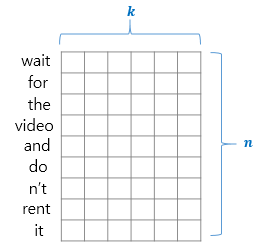


[참조 : https://wikidocs.net/184983 ]

위 그림에서 n은 문장의 길이, k는 임베딩 벡터의 차원임
1D 합성곱 연산에서 커널의 너비는 문장 행렬에서의 임베딩 벡터의 차원과 동일하게 설정됨 (k)

커널의 너비가 임베딩 벡터의 차원과 같으므로, 
커널은 문장 행렬의 높이 방향으로만 움직이게 됨.

예를 들어 커널의 크기가 2인 경우에

wait for => for the => the video....
이런 식으로 스텝을 거치면서 연산을 하게 됨



 **3. 맥스 풀링(Max-Pooling)**
각 합성곱 연산으로부터 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산
